# Multiple Linear Regression

In [1]:
import numpy as np
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt

## 1) Dataset

In [2]:
x, y = make_regression(n_samples=100, n_features=1,noise=10)
y= y+abs(y/2)

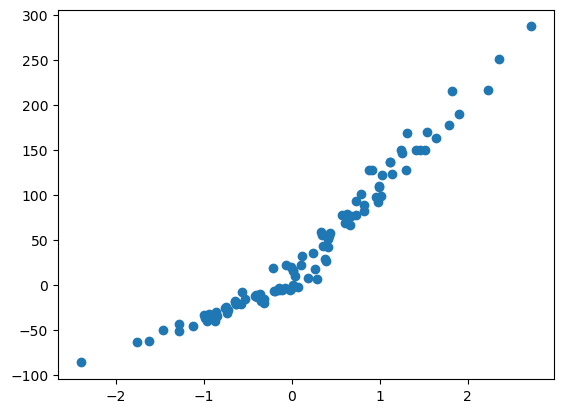

In [3]:
plt.scatter(x,y)

In [4]:
y=y.reshape(y.shape[0],1)

In [5]:
y

array([[-4.28800373e+01],
       [-1.54879060e+01],
       [ 1.28294030e+02],
       [ 7.94988138e+01],
       [-3.34894880e+00],
       [-3.41162004e+01],
       [-2.12531353e+01],
       [ 9.30114566e+01],
       [ 1.06808222e+01],
       [ 1.22228783e+02],
       [ 2.87061225e+02],
       [ 1.57781449e+01],
       [-3.14371616e+01],
       [ 3.60480770e+01],
       [-1.76180633e+01],
       [ 5.54048099e+01],
       [ 1.49507078e+02],
       [ 4.35852637e+01],
       [ 1.68661903e+01],
       [ 7.70215657e+01],
       [-1.55148539e+01],
       [-4.56802309e+01],
       [ 1.90350989e+02],
       [-9.73392299e+00],
       [ 1.27435650e+02],
       [-2.08449676e+01],
       [ 6.88695626e+01],
       [ 1.68696885e+02],
       [ 1.28039224e+02],
       [ 8.19233690e+01],
       [-1.27606572e+01],
       [ 3.18862268e+01],
       [ 1.50391842e+02],
       [ 2.84807489e+01],
       [-4.53037737e+00],
       [-8.58094974e+01],
       [ 8.31882828e+00],
       [ 1.80861838e+01],
       [ 6.6

In [6]:
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [7]:
X= np.hstack((x**2,x,np.ones(x.shape)))


In [8]:
theta = np.random.randn(3,1)

theta

array([[-1.00417025],
       [-0.19853991],
       [ 1.05108771]])

## 2) Modele Linéaire

In [9]:
def model(X,theta):
    return X.dot(theta)


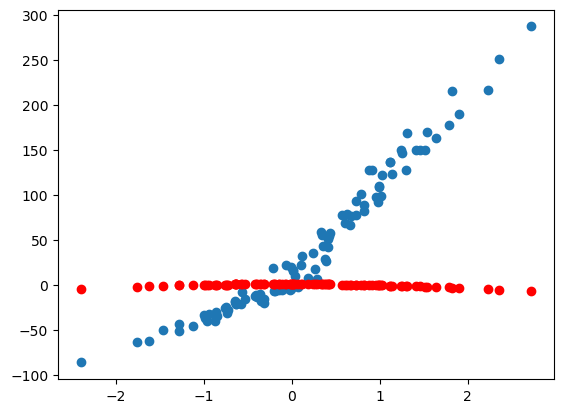

In [10]:
plt.scatter(x,y)
plt.scatter(x,model(X,theta),c="r")

## 3) Cost Function : EQR

In [11]:
def cost_function(x,y,theta):
    m= len(y)
    return 1/(2*m) * np.sum((model(x, theta) - y )**2)

In [12]:
cost_function(X,y,theta)

4089.5211194902677

## 4) Gradient et descente de gradient

In [13]:
def grad(X,y,theta):
    m= len(y)
    return 1/m * X.T.dot( model(X,theta)- y)

In [14]:
def gradient_descent(X,y,theta, learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i]= cost_function(X,y,theta)
    
    return theta,cost_history

##  5) Machine Learning


In [15]:
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1100)

In [16]:
theta_final

array([[12.66260439],
       [72.75906515],
       [18.10583919]])

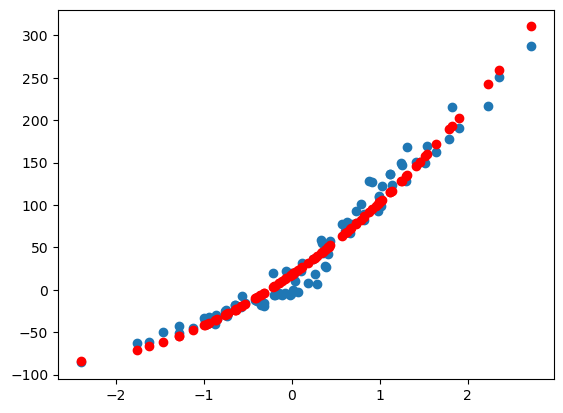

In [17]:
prediction = model(X,theta_final)
plt.scatter(x,y)
plt.scatter(x,prediction, c = "r")

## 6) Courbes d'apprentissage

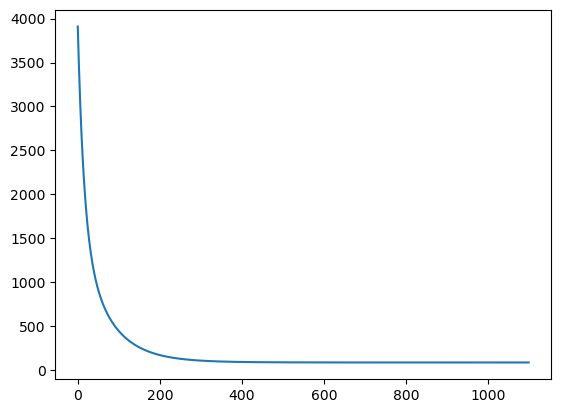

In [18]:
plt.plot(range(1100),cost_history)

 ## 7) Evaluation finale

In [19]:
def coef_determination(y,pred):
    u= ((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1- u/v

In [20]:
coef_determination(y,pred=prediction)

0.971779948437377